Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link



# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.


# Ans:-

In [2]:
import pandas as pd

df=pd.read_csv("C:\\Users\\meshr\\OneDrive\\Desktop\\Data_Science_Notes 2023\\PW_skill\\Machine learning\\Assignments\\dataset.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 1. handling missing values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Insights:- no missing values in datasets

## 2. encoding categorical variables,

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

Insights:- No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling

## 3. Seperating X and Y variables

In [13]:
X=df.drop(labels=['target'],axis=1)
Y=df[['target']]

In [15]:
Y.value_counts()

target
1         165
0         138
Name: count, dtype: int64

---
---

# Q2. Split the dataset into a training set (70%) and a test set (30%).


# Ans:-

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [18]:
X_train.shape

(212, 13)

In [19]:
X_test.shape

(91, 13)

---
---

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.


# Ans:-

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train,y_train.values.flatten())

RandomForestClassifier(max_depth=10)

---
---

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.


# Ans:-

In [22]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
## Pridiction 
y_pred=rfc.predict(X_test)

In [29]:
print(f'Accuracy Score :{accuracy_score(y_test,y_pred)}')
print(f'Precision Score :{precision_score(y_test,y_pred)}')
print(f'Recall Score    : {recall_score(y_test,y_pred)}')
print(f'F1 Score        :{f1_score (y_test,y_pred)}')

Accuracy Score :0.8021978021978022
Precision Score :0.82
Recall Score    : 0.82
F1 Score        :0.82


---
---

# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.


# Ans:-

In [30]:
rfc.feature_importances_

array([0.08638571, 0.02596941, 0.1095592 , 0.07515316, 0.07263133,
       0.01222526, 0.02208996, 0.10640157, 0.0701779 , 0.10757751,
       0.05092744, 0.13849102, 0.12241053])

In [31]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [32]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.138491
thal        0.122411
cp          0.109559
oldpeak     0.107578
thalach     0.106402
age         0.086386
trestbps    0.075153
chol        0.072631
exang       0.070178
slope       0.050927
sex         0.025969
restecg     0.022090
fbs         0.012225
dtype: float64

In [33]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'thal', 'cp', 'oldpeak', 'thalach']


<Axes: title={'center': 'Feature Importances Plot'}>

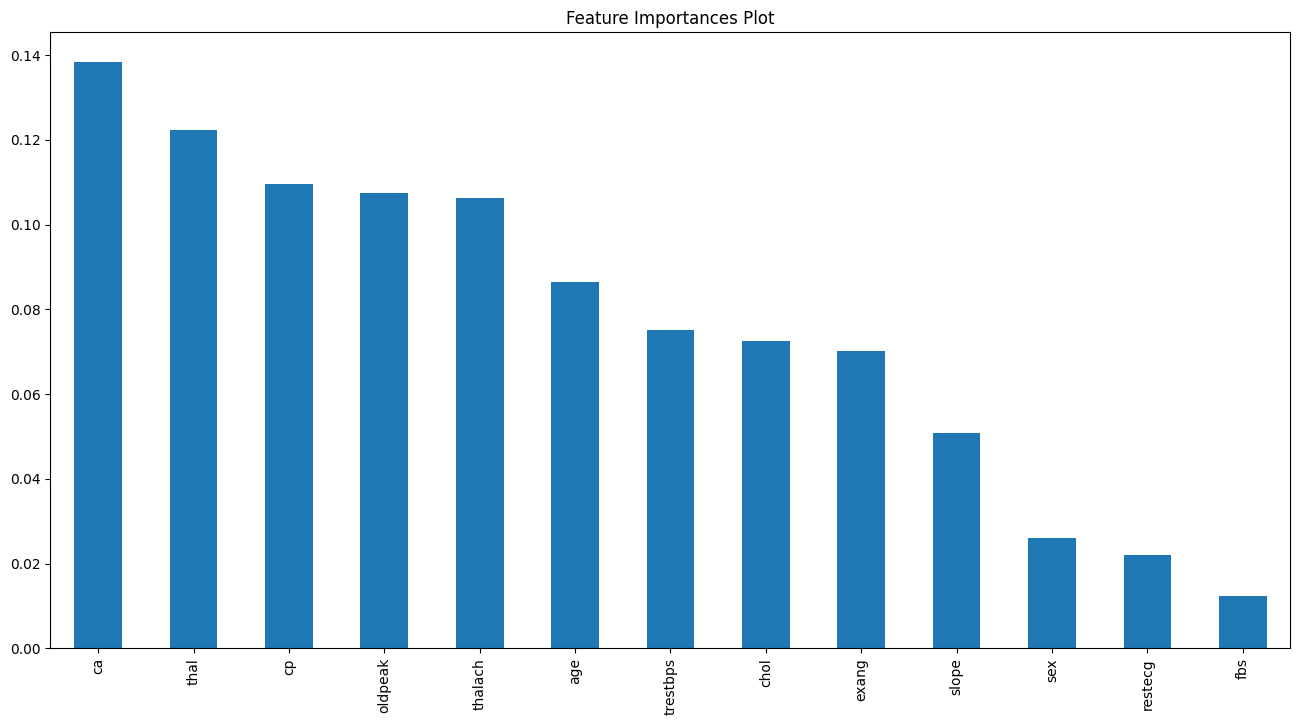

In [34]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

---
---

# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


# Ans:-

In [35]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [48]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [49]:
rscv.fit(X_train,y_train.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.808 total time=   0.2s
[CV 4/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.894 total time=   0.2s
[CV 5/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.818 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.809 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.809 total time=   0.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [51]:
rscv.best_score_

0.8560775193798449

---
---

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.


# Ans:-

In [52]:
# Best Parameters
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 5}

In [53]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=6)

In [54]:
# Best F1 Score
rscv.best_score_

0.8560775193798449

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [59]:
acc_base, pre_base, rec_base, f1_base = evaluate_model(X_test, y_test, rfc)

Accuracy Score  : 0.8022
Precision Score : 0.8200
Recall Score    : 0.8200
F1 Score        : 0.8200


In [56]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(X_test,y_test.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score  : 0.8462
Precision Score : 0.8462
Recall Score    : 0.8800
F1 Score        : 0.8627


In [60]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [61]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.802198,0.846154
1,precision,0.820000,0.846154
2,recall,0.820000,0.880000
3,f1,0.820000,0.862745


---
---

# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

# Ans:-

In [62]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_leaf=6)

In [63]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.190639
cp          0.157225
thal        0.147001
exang       0.115271
thalach     0.108379
oldpeak     0.098876
age         0.046434
slope       0.045410
chol        0.028175
trestbps    0.026768
sex         0.022210
restecg     0.011683
fbs         0.001929
dtype: float64

In [64]:
imp_tuned[0:2]

ca    0.190639
cp    0.157225
dtype: float64

<Axes: title={'center': 'Feature Importances for tuned model'}>

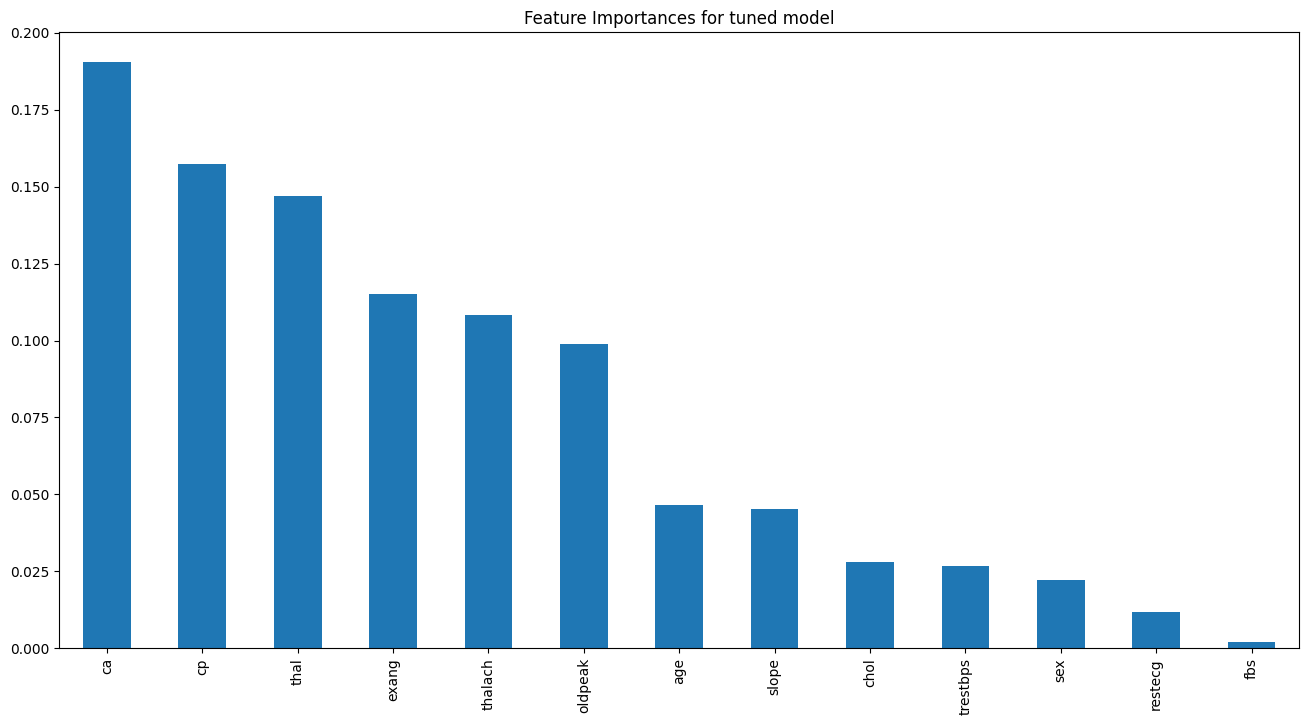

In [65]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [67]:
top2 = X_train[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [69]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


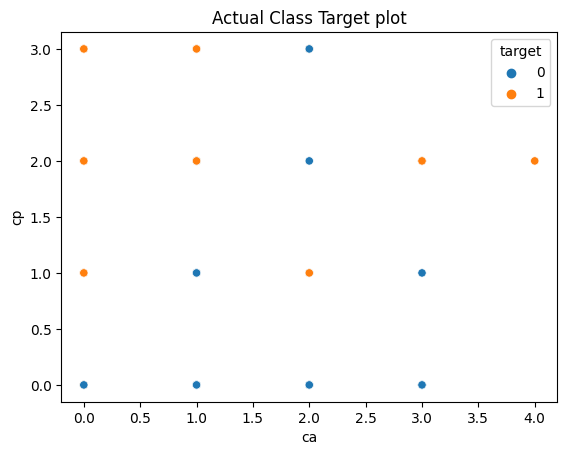

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [72]:
df_top2['predicted'] = best_rfc.predict(X_train)

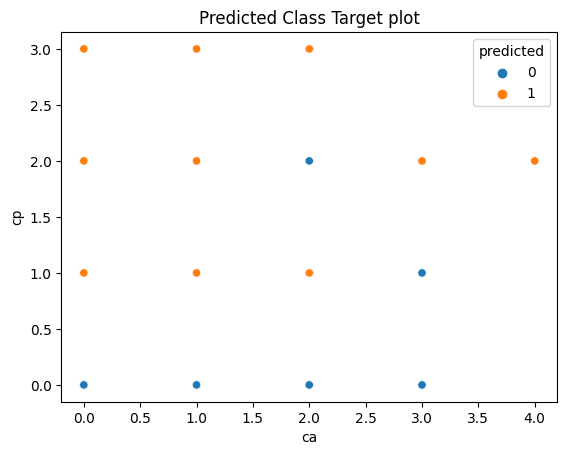

In [73]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()

---
---